Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

Uploading and exploring dataset

In [2]:
data = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [3]:
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [ ]:
data.tail()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1
999,9990855,25,1,0,158,270,0,0,143,1,4.7,0,0,0


In [ ]:
data.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [ ]:
data.shape

(1000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


Removing zero values

In [4]:
non_zero = ['restingBP','serumcholestrol','maxheartrate']
for column in non_zero:
    data[column] = data[column].replace(0,np.NaN)
    mean = int(data[column].mean(skipna = True))
    data[column] = data[column].replace(np.NaN,mean)
    print(data[column])

0      171
1       94
2      133
3      138
4      199
      ... 
995    139
996    143
997    156
998    186
999    158
Name: restingBP, Length: 1000, dtype: int64
0      328.0
1      229.0
2      142.0
3      295.0
4      328.0
       ...  
995    349.0
996    258.0
997    434.0
998    417.0
999    270.0
Name: serumcholestrol, Length: 1000, dtype: float64
0      147
1      115
2      202
3      153
4      136
      ... 
995    183
996     98
997    196
998    117
999    143
Name: maxheartrate, Length: 1000, dtype: int64


In [ ]:
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,328.0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229.0,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142.0,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295.0,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,328.0,0,2,136,0,5.3,3,2,1


Checking for Null values

In [ ]:
data.isnull().any()

patientid            False
age                  False
gender               False
chestpain            False
restingBP            False
serumcholestrol      False
fastingbloodsugar    False
restingrelectro      False
maxheartrate         False
exerciseangia        False
oldpeak              False
slope                False
noofmajorvessels     False
target               False
dtype: bool

Assigning dependent and independent variables

In [5]:
x = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].values
y= data.iloc[:,[13]].values

Dividing the data into a training dataset and a test dataset

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 99)

Scale Data

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Building Network

In [16]:
network = Sequential()
network.add(Dense(activation = "relu", input_dim = 12, 
                     units = 8, kernel_initializer = "uniform"))
network.add(Dense(activation = "relu", units = 13, 
                     kernel_initializer = "uniform"))
network.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
network.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )


In [17]:
history = network.fit(x_train , y_train , batch_size = 8 ,epochs = 30, verbose =2, validation_split=0.2)

Epoch 1/30
70/70 - 1s - loss: 0.6866 - accuracy: 0.6393 - val_loss: 0.6674 - val_accuracy: 0.8857 - 753ms/epoch - 11ms/step
Epoch 2/30
70/70 - 0s - loss: 0.5806 - accuracy: 0.9268 - val_loss: 0.4575 - val_accuracy: 0.9286 - 132ms/epoch - 2ms/step
Epoch 3/30
70/70 - 0s - loss: 0.3374 - accuracy: 0.9339 - val_loss: 0.2512 - val_accuracy: 0.9357 - 137ms/epoch - 2ms/step
Epoch 4/30
70/70 - 0s - loss: 0.2102 - accuracy: 0.9357 - val_loss: 0.1892 - val_accuracy: 0.9357 - 143ms/epoch - 2ms/step
Epoch 5/30
70/70 - 0s - loss: 0.1722 - accuracy: 0.9446 - val_loss: 0.1669 - val_accuracy: 0.9500 - 148ms/epoch - 2ms/step
Epoch 6/30
70/70 - 0s - loss: 0.1548 - accuracy: 0.9464 - val_loss: 0.1582 - val_accuracy: 0.9429 - 180ms/epoch - 3ms/step
Epoch 7/30
70/70 - 0s - loss: 0.1420 - accuracy: 0.9536 - val_loss: 0.1488 - val_accuracy: 0.9429 - 205ms/epoch - 3ms/step
Epoch 8/30
70/70 - 0s - loss: 0.1305 - accuracy: 0.9518 - val_loss: 0.1470 - val_accuracy: 0.9429 - 133ms/epoch - 2ms/step
Epoch 9/30
70/7

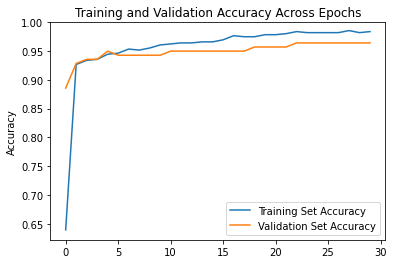

In [23]:
accuracy = history.history['accuracy'] 
validation_accuracy = history.history['val_accuracy'] 
plt.plot(accuracy, label='Training Set Accuracy') 
plt.plot(validation_accuracy, label='Validation Set Accuracy') 
plt.ylabel('Accuracy') 
plt.ylim([min(plt.ylim()),1]) 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()

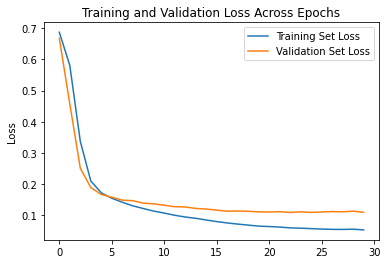

In [24]:
loss = history.history['loss'] 
validation_loss = history.history['val_loss'] 
plt.plot(loss, label='Training Set Loss') 
plt.plot(validation_loss, label='Validation Set Loss') 
plt.ylabel('Loss') 
plt.title('Training and Validation Loss Across Epochs') 
plt.legend()

Peforming prediction

In [19]:
y_pred = network.predict(x_test)
y_pred = (y_pred >0.5)

10/10 [==============================] - 0s 2ms/step


Confusion Matrix

In [20]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[126,   4],
       [  6, 164]])

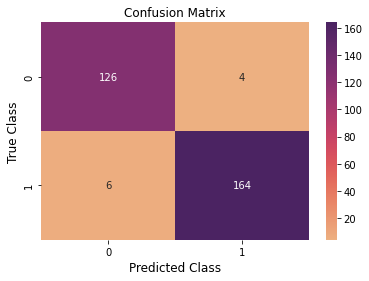

In [21]:
import seaborn as sns
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       130
           1       0.98      0.96      0.97       170

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

